In [18]:
import functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fileName = 'W_A2_0_3.jpg'

In [20]:
img = cv2.imread(f'./sourceImages/{fileName}')

In [21]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)
newScale = 255 * np.cumsum(hist)
newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
newScale = newScale.astype(np.uint8)

img = newScale[grayImg]

In [22]:
img_1 = (functions.conv(img, np.ones([25, 25]))/625).astype(np.uint8)

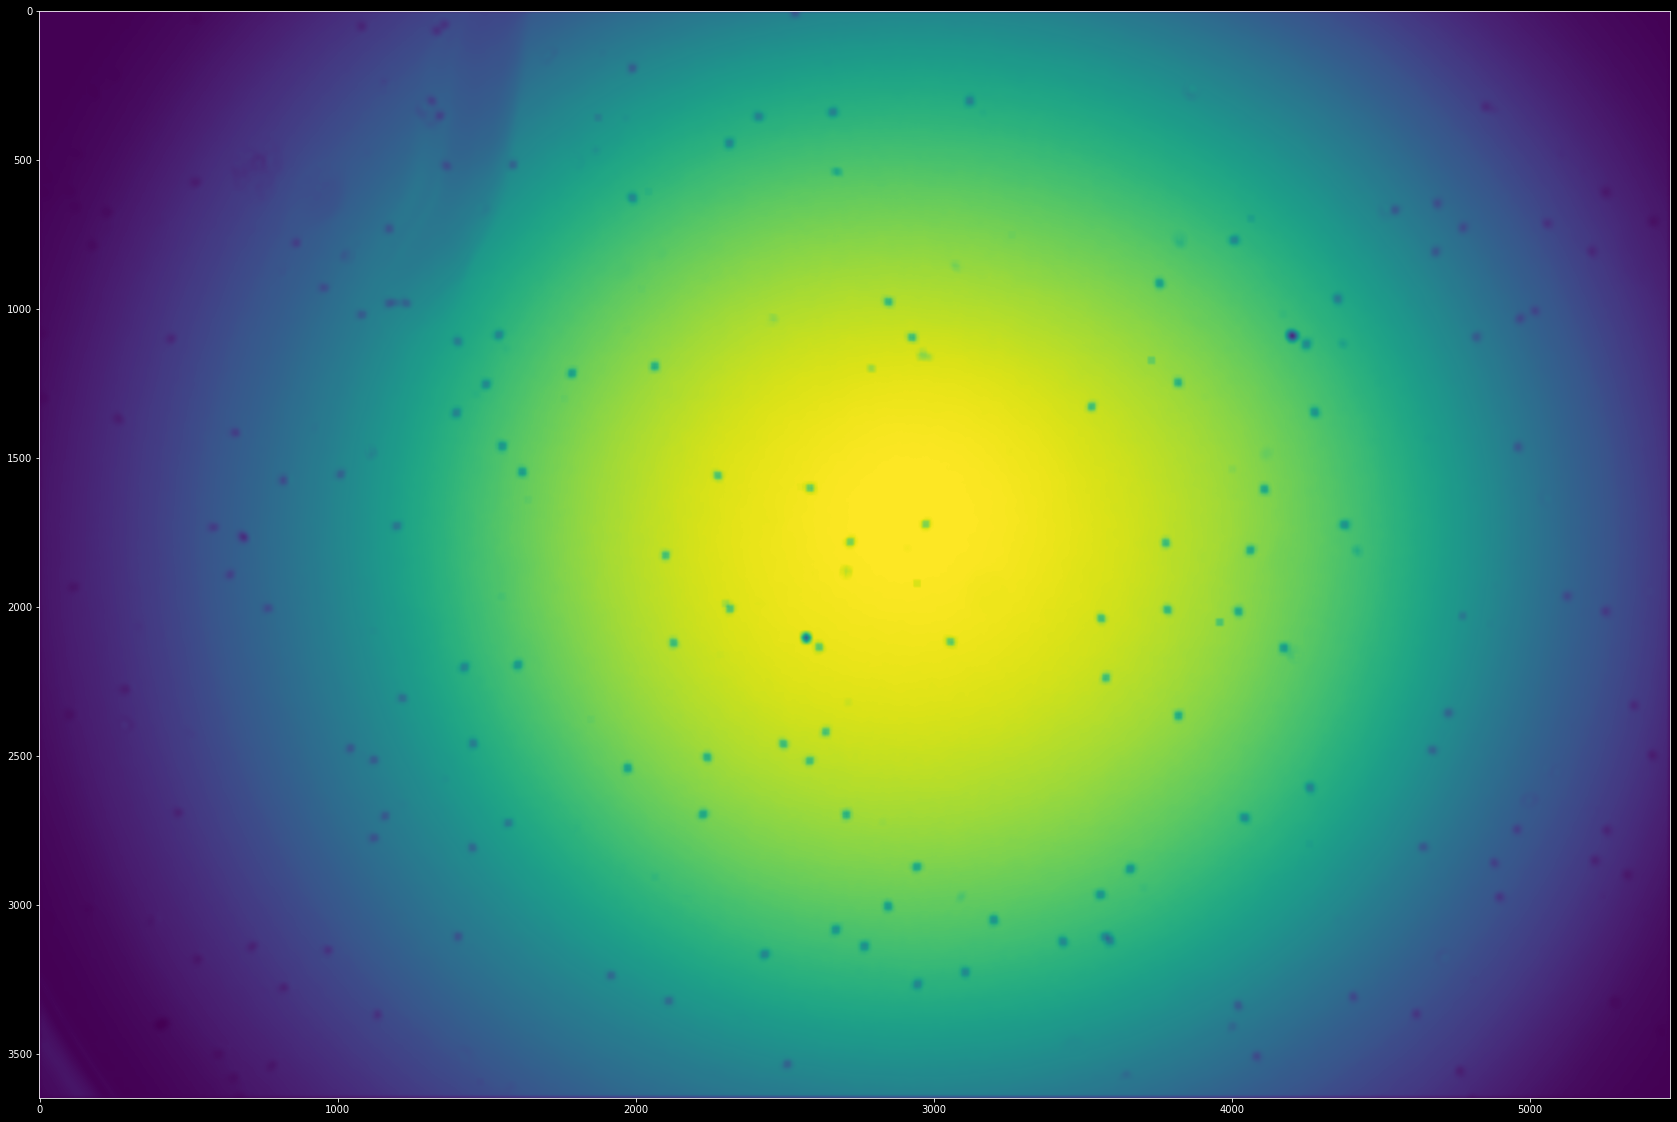

In [23]:
plt.figure(figsize=(30, 20))
plt.imshow(img_1)

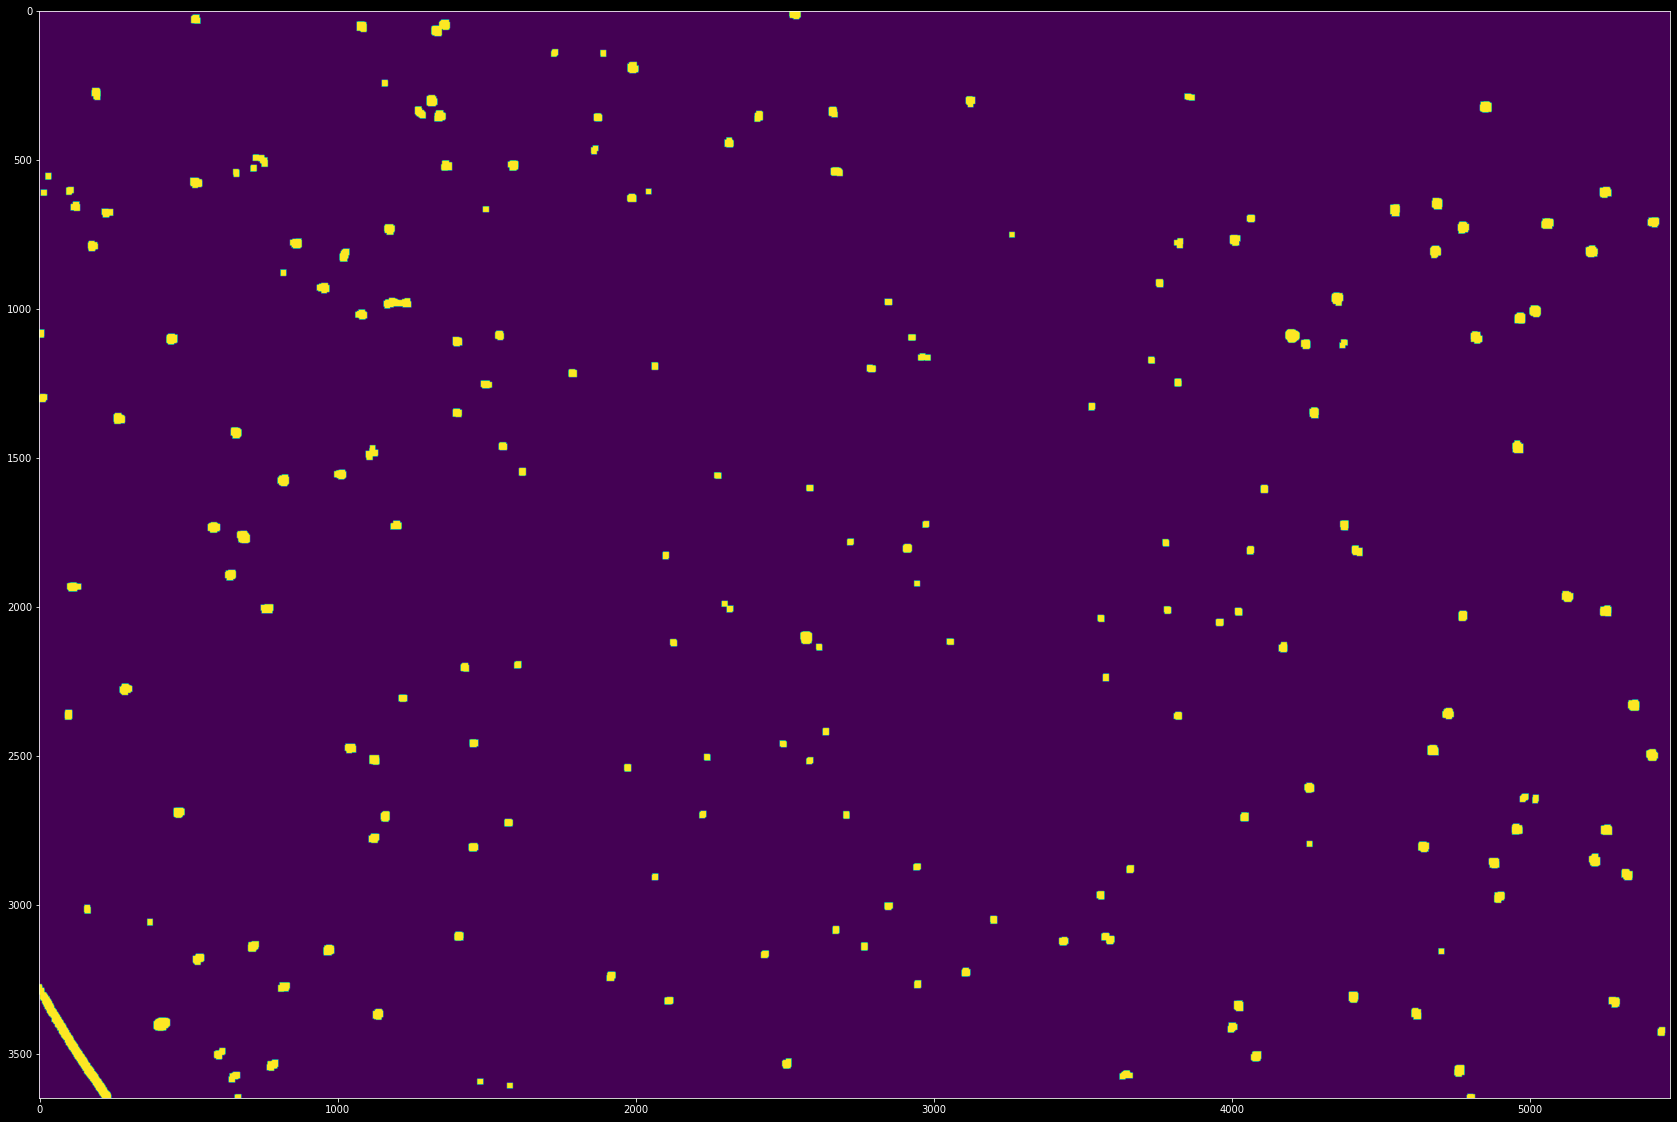

In [24]:
i = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 111, 3)
i = cv2.erode(i, np.ones([7, 7]))
i = cv2.dilate(i, np.ones([7, 7]), iterations=3)

plt.figure(figsize=(30, 20))
plt.imshow(i)

In [13]:
img_2 = functions.adaptiveThreshold(img_1, kernalSize = 111, offset=-3)

In [ ]:
img_6 = cv2.cvtColor(np.logical_not(img_3).astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)
cv2.imwrite(f'./resultImages/{fileName}', img_6)